In [105]:
import importlib

import pandas as pd
import numpy as np
import tocdata 

import matplotlib.pyplot as plt



#Loading training data,  
dataY=pd.read_csv('data/Morelia_train_Y.csv')
dataX=pd.read_csv('data/Morelia_train_X.csv')

dataYv=pd.read_csv('data/Morelia_validation_Y.csv')
dataXv=pd.read_csv('data/Morelia_validation_X.csv')

#Selecting a feature and class labels

#
#Index(['ixs', 'lat', 'lon', 'pendiente', 'dist_anps', 'dist_agua',
#       'dist_vegetacion', 'dist_urbano', 'dist_centro', 'dist_carreteras',
#       'costo'],
#      dtype='object')


In [106]:
import ootoc as otoc
importlib.reload(otoc)

<module 'ootoc' from '/Users/rodrigo/SourcesCodes/GitHub/TOCS/nueva version toc/TOC/ootoc.py'>

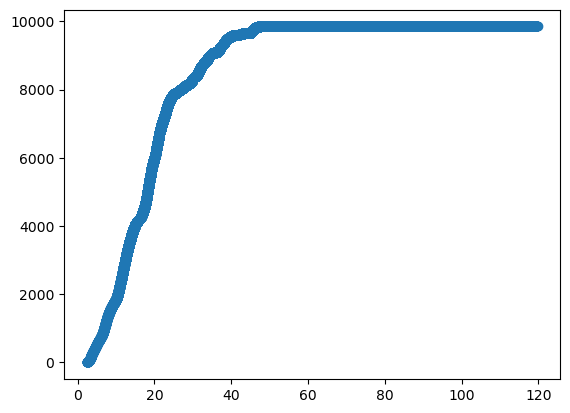

In [107]:
plt.scatter(-T.thresholds[~T.idiscontinuous], T.TP[~T.idiscontinuous])

In [108]:
len(T.rank[T.indices][~T.idiscontinuous[1:]])

934842

In [109]:
len(T.TP[1:][~T.idiscontinuous[1:]])

934842

In [67]:
plt.scatter(-T.rank[T.indices][~T.idiscontinuous[1:]], M[1:][~T.idiscontinuous[1:]])

TypeError: only integer scalar arrays can be converted to a scalar index

In [75]:
len(M[1:])

1001995

In [73]:
len(~T.idiscontinuous[1:])

1001995

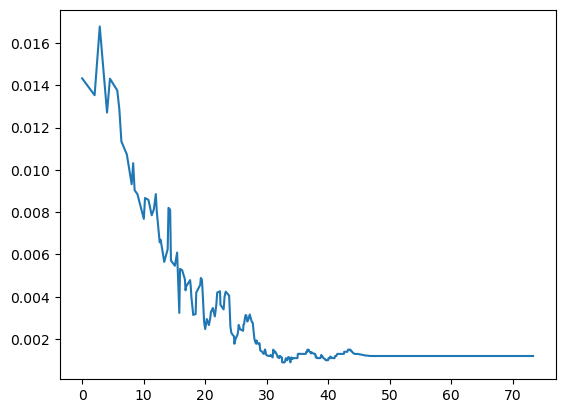

variable: pendiente
0.9999999999999999
1.0


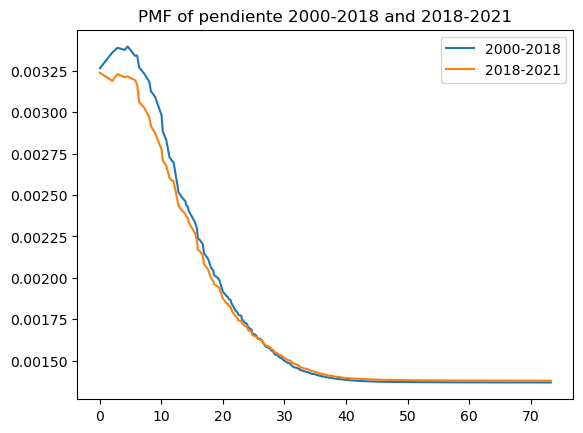

variable: dist_anps
1.0000000000000002
0.9999999999999997


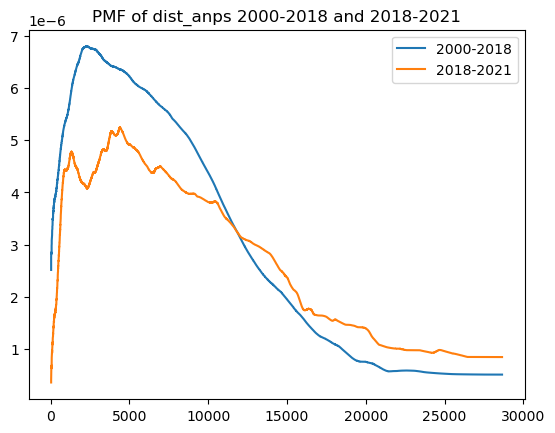

variable: dist_agua
0.9999999999999998
1.0


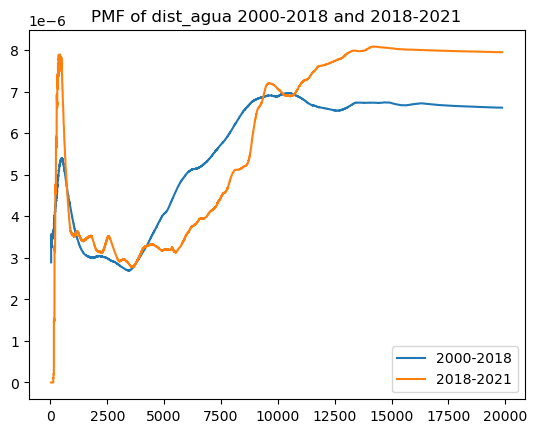

variable: dist_vegetacion
1.0
1.0


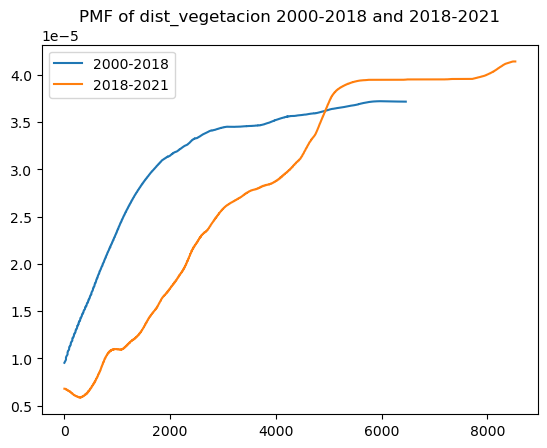

variable: dist_urbano
1.0000000000000002
1.0


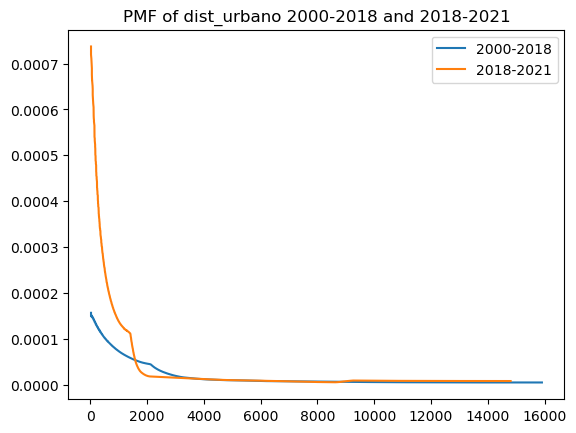

variable: dist_centro
0.9999999999999998
1.0000000000000002


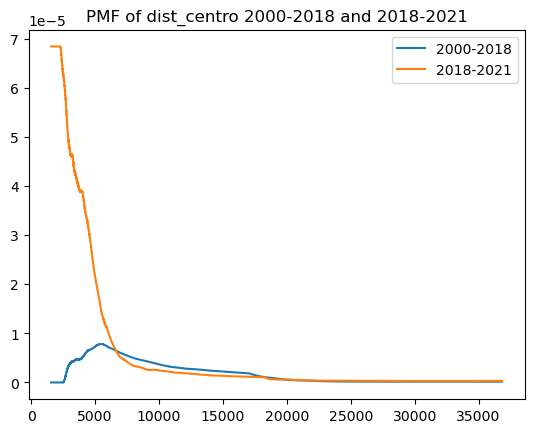

variable: dist_carreteras
0.9999999999999999
1.0


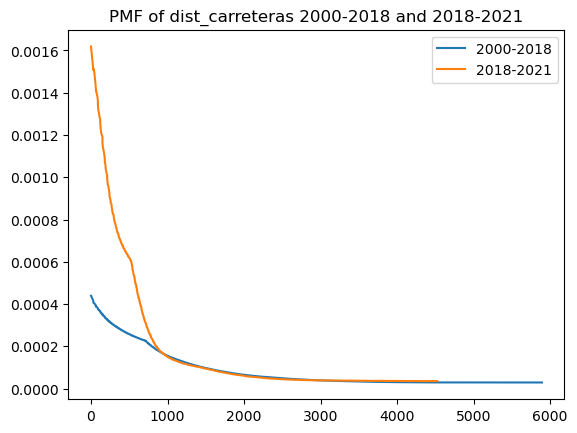

variable: costo
1.0000000000000009
0.9999999999999996


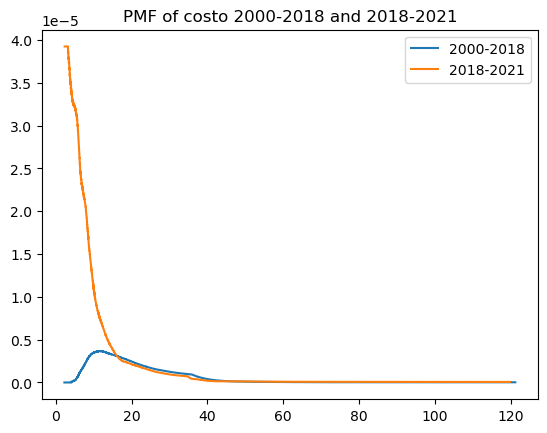

In [110]:
label = dataY.incremento_urbano.to_numpy()
labelv = dataYv.incremento_urbano.to_numpy()

for c in dataX.columns[3:]:
    print("variable:", c)
    feature = dataX[c].to_numpy()
    featurev = dataXv[c].to_numpy()
    
    T = otoc.TOC(rank = -feature, groundtruth = label)

    X = T.TPplusFP[~T.idiscontinuous]

    Y = T.TP[~T.idiscontinuous]
    
    M = T.generateMassFunction_secant(X, Y, h = 500000)
    #plt.plot(M/np.sum(M))
  #  plt.axhline(y = np.mean(label)/np.sum(M))
   # plt.show()

    ix = ~T.idiscontinuous[1:]
    plt.plot(-T.rank[T.indices][ix], np.array(M)[1:][ix]/ np.sum(np.array(M)[1:][ix]), label = "2000-2018")
    plt.title("PMF of" + c + "2000-2018")
    print(np.sum(np.array(M)[1:][ix]/np.sum(np.array(M)[1:][ix])))
    
    T = otoc.TOC(rank = -featurev, groundtruth = labelv)
    
    X = T.TPplusFP[~T.idiscontinuous]
    Y = T.TP[~T.idiscontinuous]
    
    M = T.generateMassFunction_secant(X, Y, h = 500000)
    #plt.plot(M/np.sum(M))
    ix = ~T.idiscontinuous[1:]
    plt.plot(-T.rank[T.indices][ix], np.array(M)[1:][ix]/np.sum(np.array(M)[1:][ix]), label = "2018-2021")
    plt.title("PMF of " + c + " 2000-2018 and 2018-2021")
    print(np.sum(np.array(M)[1:][ix]/np.sum(np.array(M)[1:][ix])))
    #plt.axhline(y = np.mean(labelv)/np.sum(M))
    plt.legend()
    plt.show()

    
    


    
